# Wind Energy Illinois

This notebook is for processing existing data about wind energy in Illinois

The data used in this notebook is available from:

[Wind Exchange -- DOE-EERE](https://windexchange.energy.gov/maps-data/321)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('./installed_wind_capacity_by_state.xls', skiprows=5)
il_df = df[df['State']=='Illinois']

In [3]:
il_df

,State,1999-12-31 00:00:00,2000-12-31 00:00:00,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00,2005-12-31 00:00:00,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,Q3 6/30/2017
13,Illinois,0.0,0.0,0.0,0.0,50.4,51.06,107.16,107.16,699.37,915.07,1547.47,2044.56,2742.0,3568.0,3568.0,3568,3842,4026.0,4026.0


In [4]:
il_df = il_df.T

In [5]:
il_df = il_df.drop(il_df.index[[0,-1]])

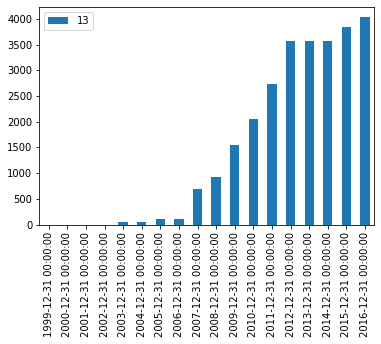

In [6]:
il_df.plot(kind='bar')

In [7]:
key = il_df.keys()[0]

In [8]:
years = np.arange(1999,2021,1)
capacity = np.array(il_df[key])
capacity

array([0.0, 0.0, 0.0, 0.0, 50.4, 51.059999999999995, 107.16, 107.16,
       699.37, 915.0699999999999, 1547.47, 2044.56, 2742.0, 3568.0,
       3568.0, 3568, 3842, 4026.0], dtype=object)

### Note: 
The downloadable data from DOE-EERE does not include years from 2017-2020, but the data exists in the widget.
Adding data from the widget.

In [9]:
import IPython
iframe = '<iframe src="https://widgets.nrel.gov/mea/wind-exchange/" style="width: 825px; height: 1000px; margin: 0 auto; display: block;" : "width: 100%; height: 1000px;" scrolling="no" frameborder="0"></iframe>'
IPython.display.HTML(iframe)

/Users/huff/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [10]:
recent_cap = np.array([4332,4861,5350,6409])
capacity = np.concatenate([capacity, recent_cap])

In [11]:
delta_capacity = np.diff(capacity)

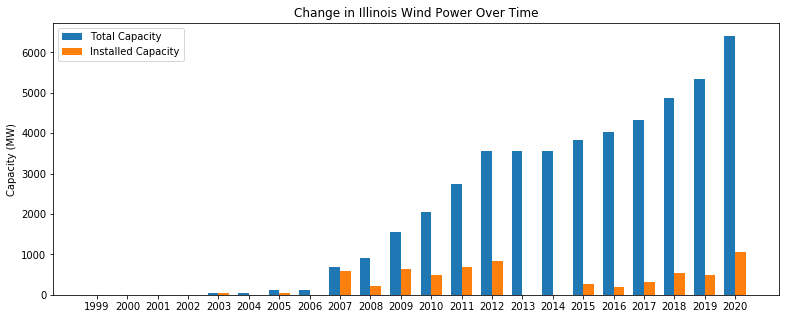

In [12]:
fig, ax = plt.subplots(figsize=(13,5))
width = 0.35
rects1 = ax.bar(years - width/2, capacity, width, label='Total Capacity')
rects2 = ax.bar(years[1:] + width/2, delta_capacity, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Wind Power Over Time')
ax.set_xticks(years)
ax.legend()
plt.show()

In [13]:
delta_capacity

array([0.0, 0.0, 0.0, 50.4, 0.6599999999999966, 56.1, 0.0, 592.21,
       215.69999999999993, 632.4000000000001, 497.0899999999999, 697.44,
       826.0, 0.0, 0.0, 274, 184.0, 306.0, 529, 489, 1059], dtype=object)